<a href="https://colab.research.google.com/github/thanhnhan311201/CS106.L21.KHCL/blob/main/ValueIteration_PolicyIteration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Lib

In [80]:
import gym
import numpy as np
import time
from IPython import display

# Value Iteration Algorithm

In [90]:
def value_iteration(env, max_iters, gamma=0.9):
  v_values = np.zeros(env.observation_space.n)

  begin_time = time.time()

  for i in range(max_iters):
    prev_v_values = np.copy(v_values)
    # Compute the value for each state
    for state in range(env.observation_space.n):
      q_values = []

      # Compute the q-value for each action
      for action in range(env.action_space.n):
        q_value = 0
        # Loop through each possible outcome
        for prob, next_state, reward, done in env.P[state][action]:
          q_value += prob * (reward + gamma * prev_v_values[next_state])

        q_values.append(q_value)

      # Select the biggest q-value
      best_action = np.argmax(q_values)
      v_values[state] = q_values[best_action]

    # Check convergence
    if np.all(np.isclose(v_values, prev_v_values)):
      print(f'Converge at {i+1}-th iteration.')
      exe_time = time.time() - begin_time
      break

  return v_values, exe_time

In [91]:
def policy_extracion(env, v_values, gamma=0.9):
  policy = np.zeros(env.observation_space.n, dtype=np.int)
  for state in range(env.observation_space.n):
    q_values = []
    # Compute q-value for each action
    for action in range(env.action_space.n):
      q_value = 0
      for prob, next_state, reward, done in env.P[state][action]:
        q_value += prob * (reward + gamma * v_values[next_state])

      q_values.append(q_value)

    # Select the best action
    best_action = np.argmax(q_values)
    policy[state] = best_action

  return policy

# Policy Iteration Algorithm

In [92]:
def policy_evaluation(env, max_iters, policy, gamma=0.9):
    p_values = np.zeros(env.observation_space.n)

    for i in range(max_iters):
        prev_p_values = np.copy(p_values)
        # Compute the value for each state
        for state in range(env.observation_space.n):
            q_value = 0
            action = policy[state]

            # Loop through each possible outcome
            for prob, next_state, reward, done in env.P[state][action]:
                q_value += prob * (reward + gamma * prev_p_values[next_state])

            p_values[state] = q_value

        # Check convergence
        if np.all(np.isclose(p_values, prev_p_values)):
            print(f'Policy evaluation convergence at {i+1}-th iteration')
            break

    return p_values

In [93]:
def policy_improvement(env, p_values, gamma=0.9):
    policy = np.zeros(env.observation_space.n, dtype=np.int)

    # Compute the value for each state
    for state in range(env.observation_space.n):
        q_values = []
        # Compute q-value for each action
        for action in range(env.action_space.n):
            q_value = 0
            for prob, next_state, reward, done in env.P[state][action]:
                q_value += prob * (reward + gamma * p_values[next_state])

            q_values.append(q_value)

        # Improve policy
        best_action = np.argmax(q_values)
        policy[state] = best_action

    return policy

In [94]:
def policy_iteration(env, max_iters, gamma=0.9):
    policy = np.random.randint(env.action_space.n, size=env.observation_space.n)

    for i in range(max_iters):
        prev_policy = np.copy(policy)
        begin_time = time.time()
        p_values = policy_evaluation(env, max_iters, policy, gamma=0.9)
        policy = policy_improvement(env, p_values, gamma=0.9)

        if np.all(np.isclose(policy, prev_policy)):
            print('------------------------------------')
            print(f'Policy iteration converge at {i+1}-th iteration')
            exe_time = time.time() - begin_time
            break

    return policy, exe_time

# Game function

In [8]:
def play(env, policy):
    state = env.reset()
    total_reward = 0
    done = False
    steps = 0
    time.sleep(1)
    display.clear_output(wait=True)

    while not done:
        action = policy[state]
        next_state, reward, done, info = env.step(action)
        total_reward += reward
        steps += 1
        env.render()
        print(f'Step: {steps}')
        print(f'Step reward: {reward}')
        print(f'Total reward: {total_reward}')
        time.sleep(0.2)
        if not done:
           display.clear_output(wait=True)
        state = next_state

    if total_reward > 0:
        print('Win!')
    else:
        print('Lose!')
    return total_reward

In [9]:
def play_multiple_times(env, policy, max_episodes):
    success = 0

    for i in range(max_episodes):
        state = env.reset()
        total_reward = 0
        done = False

        while not done:
            action = policy[state]
            next_state, reward, done, info = env.step(action)
            total_reward += reward
            state = next_state

        if total_reward > 0:
              success += 1
    
    print(f'Number of successes: {success}/{max_episodes}')

# FrozenLake-v0

In [81]:
env_F4x4_v0 = gym.make('FrozenLake-v0')

In [82]:
env_F4x4_v0.observation_space.n

16

In [83]:
env_F4x4_v0.action_space.n

4

## Value Iteration

In [11]:
v_values_F4x4_v0, v_exe_time_F4 = value_iteration(env_F4x4_v0, max_iters=1000, gamma=0.9)

Converge at 80-th iteration.


In [12]:
v_values_F4x4_v0

array([0.06888615, 0.06141054, 0.07440682, 0.05580409, 0.09185022,
       0.        , 0.11220663, 0.        , 0.14543286, 0.2474946 ,
       0.29961593, 0.        , 0.        , 0.3799342 , 0.63901926,
       0.        ])

In [13]:
v_exe_time_F4

0.06053519248962402

In [14]:
v_policy_F4x4_v0 = policy_extracion(env_F4x4_v0, v_values_F4x4_v0, gamma=0.9)
print(v_policy_F4x4_v0)

[0 3 0 3 0 0 0 0 3 1 0 0 0 2 1 0]


In [15]:
play(env_F4x4_v0, v_policy_F4x4_v0)

  (Down)
SFFF
FHFH
FFFH
HFFG
Step: 35
Step reward: 1.0
Total reward: 1.0
Win!


1.0

In [16]:
play_multiple_times(env_F4x4_v0, v_policy_F4x4_v0, max_episodes=1000)

Number of successes: 720/1000


## Policy Iteration

In [17]:
p_policy_F4x4_v0, p_exe_time_F4 = policy_iteration(env_F4x4_v0, max_iters=1000, gamma=0.9)
print(p_policy_F4x4_v0)

Policy evaluation convergence at 23-th iteration
Policy evaluation convergence at 29-th iteration
Policy evaluation convergence at 63-th iteration
Policy evaluation convergence at 80-th iteration
Policy evaluation convergence at 81-th iteration
------------------------------------
Policy iteration converge at 5-th iteration
[0 3 0 3 0 0 0 0 3 1 0 0 0 2 1 0]


In [18]:
p_exe_time_F4

0.012369871139526367

In [19]:
play(env_F4x4_v0, p_policy_F4x4_v0)

  (Down)
SFFF
FHFH
FFFH
HFFG
Step: 12
Step reward: 1.0
Total reward: 1.0
Win!


1.0

In [20]:
play_multiple_times(env_F4x4_v0, p_policy_F4x4_v0, max_episodes=1000)

Number of successes: 719/1000


# FrozenLake8x8-v0

In [84]:
env_F8x8_v0 = gym.make('FrozenLake8x8-v0')

In [85]:
env_F8x8_v0.observation_space.n

64

In [86]:
env_F8x8_v0.action_space.n

4

## Value Iteration

In [22]:
v_values_F8x8_v0, v_exe_time_F8 = value_iteration(env_F8x8_v0, max_iters=1000, gamma=0.9)

Converge at 118-th iteration.


In [23]:
v_values_F8x8_v0

array([0.00641104, 0.00854808, 0.01230044, 0.01778942, 0.02508214,
       0.03247089, 0.03957134, 0.04297844, 0.00602405, 0.00764512,
       0.01091162, 0.01642654, 0.02605411, 0.03619409, 0.0493547 ,
       0.05730461, 0.00509024, 0.0058532 , 0.00677534, 0.        ,
       0.02557084, 0.03882139, 0.06763973, 0.08435607, 0.0042256 ,
       0.00476954, 0.00581968, 0.0078541 , 0.02036065, 0.        ,
       0.09175501, 0.12919111, 0.00318093, 0.00319659, 0.00270488,
       0.        , 0.0344439 , 0.06195145, 0.10901921, 0.20969093,
       0.00186915, 0.        , 0.        , 0.01085079, 0.03250092,
       0.06304172, 0.        , 0.36008773, 0.00118046, 0.        ,
       0.00137717, 0.00366839, 0.        , 0.11568671, 0.        ,
       0.63051379, 0.00088531, 0.00077462, 0.00092218, 0.        ,
       0.13824885, 0.32258065, 0.61443932, 0.        ])

In [24]:
v_exe_time_F8

0.30692100524902344

In [25]:
v_policy_F8x8_v0 = policy_extracion(env_F8x8_v0, v_values_F8x8_v0, gamma=0.9)
print(v_policy_F8x8_v0)

[3 2 2 2 2 2 2 2 3 3 3 3 2 2 2 1 3 3 0 0 2 3 2 1 3 3 3 1 0 0 2 1 3 3 0 0 2
 1 3 2 0 0 0 1 3 0 0 2 0 0 1 0 0 0 0 2 0 1 0 0 1 1 1 0]


In [26]:
play(env_F8x8_v0, v_policy_F8x8_v0)

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
Step: 54
Step reward: 1.0
Total reward: 1.0
Win!


1.0

In [27]:
play_multiple_times(env_F8x8_v0, v_policy_F8x8_v0, max_episodes=1000)

Number of successes: 753/1000


## Policy Iteration

In [28]:
p_policy_F8x8_v0, p_exe_time_F8 = policy_iteration(env_F8x8_v0, max_iters=1000, gamma=0.9)
print(p_policy_F8x8_v0)

Policy evaluation convergence at 1-th iteration
Policy evaluation convergence at 28-th iteration
Policy evaluation convergence at 92-th iteration
Policy evaluation convergence at 93-th iteration
Policy evaluation convergence at 91-th iteration
Policy evaluation convergence at 93-th iteration
Policy evaluation convergence at 96-th iteration
Policy evaluation convergence at 101-th iteration
Policy evaluation convergence at 113-th iteration
Policy evaluation convergence at 118-th iteration
------------------------------------
Policy iteration converge at 10-th iteration
[3 2 2 2 2 2 2 2 3 3 3 3 2 2 2 1 3 3 0 0 2 3 2 1 3 3 3 1 0 0 2 1 3 3 0 0 2
 1 3 2 0 0 0 1 3 0 0 2 0 0 1 0 0 0 0 2 0 1 0 0 1 1 1 0]


In [29]:
p_exe_time_F8

0.03680825233459473

In [30]:
play(env_F8x8_v0, p_policy_F8x8_v0)

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
Step: 75
Step reward: 1.0
Total reward: 1.0
Win!


1.0

In [31]:
play_multiple_times(env_F8x8_v0, p_policy_F8x8_v0, max_episodes=1000)

Number of successes: 773/1000


# Taxi-v3

In [87]:
env_taxi_v3 = gym.make('Taxi-v3')

In [88]:
env_taxi_v3.observation_space.n

500

In [89]:
env_taxi_v3.action_space.n

6

## Value Iteration

In [95]:
v_values_taxi_v3, v_exe_time_T3 = value_iteration(env_taxi_v3, max_iters=1000, gamma=0.9)

Converge at 117-th iteration.


In [96]:
v_values_taxi_v3

array([ 89.47323891,  32.81971401,  55.26423891,  37.57755845,
         8.43222921,  32.81971401,   8.43222921,  15.28447953,
        32.81971401,  18.09386122,  55.26423891,  21.2154998 ,
        12.75594298,  18.09386122,  12.75594298,  37.57755845,
       100.52591945,  37.57755845,  62.51591945,  42.86394891,
        79.52591945,  28.53774704,  48.73781945,  32.81971401,
        10.48035311,  37.57755845,  10.48035311,  18.09386122,
        28.53774704,  15.28447953,  48.73781945,  18.09386122,
        15.28447953,  21.2154998 ,  15.28447953,  42.86394891,
        89.47323891,  42.86394891,  55.26423891,  48.73781945,
        42.86394891,  12.75594298,  24.68388374,  15.28447953,
        24.68388374,  70.57323891,  24.68388374,  37.57755845,
        24.68388374,  12.75594298,  42.86394891,  15.28447953,
        18.09386122,  24.68388374,  18.09386122,  48.73781945,
        48.73781945,  79.52591945,  48.73781945,  55.26423891,
        37.57755845,  10.48035311,  21.2154998 ,  12.75

In [97]:
v_exe_time_T3

1.6266841888427734

In [36]:
v_policy_taxi_v3 = policy_extracion(env_taxi_v3, v_values_taxi_v3, gamma=0.9)
print(v_policy_taxi_v3)

[4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 3
 0 0 0 0 0 0 0 2 2 2 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 2 2 2 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 4 4 4 4 0 0 0 0 0 0 0 0 0 5 0 0 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 2 2 2 2 0 0 0 0 2 2 2 2 1 2 0 2 1 1
 1 1 2 2 2 2 3 3 3 3 2 2 2 2 1 2 3 2 3 3 3 3 1 1 1 1 3 3 3 3 2 2 2 2 3 1 3
 2 3 3 3 3 1 1 1 1 3 3 3 3 0 0 0 0 3 1 3 0 3 3 3 3 1 1 1 1 3 3 3 3 0 0 0 0
 3 1 3 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1
 1 4 4 4 4 1 1 1 1 1 1 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 1 1 1 5 1
 1 1 1 1 1 1 1 1 1 1 1 3 

In [37]:
play(env_taxi_v3, v_policy_taxi_v3)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Step: 17
Step reward: 20
Total reward: 4
Win!


4

In [38]:
play_multiple_times(env_taxi_v3, v_policy_taxi_v3, max_episodes=1000)

Number of successes: 1000/1000


## Policy Iteration

In [39]:
p_policy_taxi_v3, p_exe_time_T3 = policy_iteration(env_taxi_v3, max_iters=1000, gamma=0.9)
print(p_policy_taxi_v3)

Policy evaluation convergence at 95-th iteration
Policy evaluation convergence at 100-th iteration
Policy evaluation convergence at 103-th iteration
Policy evaluation convergence at 104-th iteration
Policy evaluation convergence at 105-th iteration
Policy evaluation convergence at 110-th iteration
Policy evaluation convergence at 111-th iteration
Policy evaluation convergence at 112-th iteration
Policy evaluation convergence at 113-th iteration
Policy evaluation convergence at 116-th iteration
Policy evaluation convergence at 117-th iteration
Policy evaluation convergence at 117-th iteration
Policy evaluation convergence at 117-th iteration
Policy evaluation convergence at 117-th iteration
Policy evaluation convergence at 117-th iteration
Policy evaluation convergence at 117-th iteration
Policy evaluation convergence at 117-th iteration
Policy evaluation convergence at 117-th iteration
------------------------------------
Policy iteration converge at 18-th iteration
[4 4 4 4 0 0 0 0 0 

In [40]:
p_exe_time_T3

0.18009042739868164

In [41]:
play(env_taxi_v3, p_policy_taxi_v3)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Step: 18
Step reward: 20
Total reward: 3
Win!


3

In [42]:
play_multiple_times(env_taxi_v3, p_policy_taxi_v3, max_episodes=1000)

Number of successes: 1000/1000


# Comparision

## Import lib

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

## Create comparision file

In [77]:
df = pd.DataFrame([['FrozenLake-v0', 'Value Iteration', v_exe_time_F4]]).to_csv('Time_Comparision.csv', mode='a+', header=['Game', 'Algorithm', 'Time'])
df = pd.DataFrame([['FrozenLake-v0', 'Policy Iteration', p_exe_time_F4]]).to_csv('Time_Comparision.csv', mode='a+', header=None)
df = pd.DataFrame([['FrozenLake8x8-v0', 'Value Iteration', v_exe_time_F8]]).to_csv('Time_Comparision.csv', mode='a+', header=None)
df = pd.DataFrame([['FrozenLake8x8-v0', 'Policy Iteration', p_exe_time_F8]]).to_csv('Time_Comparision.csv', mode='a+', header=None)
df = pd.DataFrame([['Taxi-v3', 'Value Iteration', v_exe_time_T3]]).to_csv('Time_Comparision.csv', mode='a+', header=None)
df = pd.DataFrame([['Taxi-v3', 'Policy Iteration', p_exe_time_T3]]).to_csv('Time_Comparision.csv', mode='a+', header=None)

## Read comparision file

In [78]:
data = pd.read_csv('Time_Comparision.csv')
data.pop('Unnamed: 0')
data

,Game,Algorithm,Time
0,FrozenLake-v0,Value Iteration,0.060535
1,FrozenLake-v0,Policy Iteration,0.012370
2,FrozenLake8x8-v0,Value Iteration,0.306921
3,FrozenLake8x8-v0,Policy Iteration,0.036808
4,Taxi-v3,Value Iteration,1.487158
5,Taxi-v3,Policy Iteration,0.180090


## Draw comparision chart

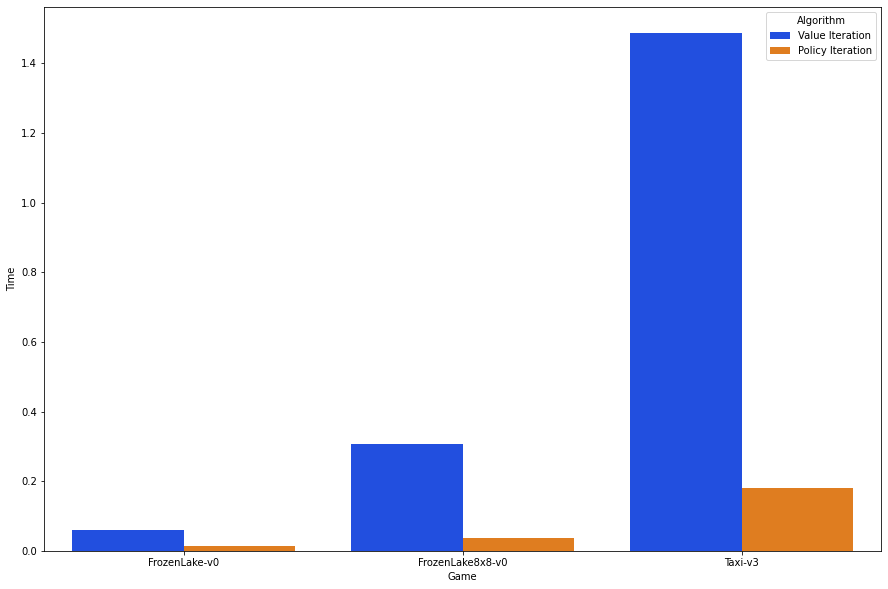

In [79]:
plt.figure(figsize=(15,10))
p = sns.barplot(x='Game', y='Time', data = data, hue='Algorithm', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=0) 